In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
from sklearn.model_selection import train_test_split
import math

random.seed(1000)

### RMSLE

In [2]:
def rmsle(y,y_, convertExp = True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v+1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v+1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [3]:
timeslotlevels = ["gowork","active","offwork","nonactive"]
weeknum = ["weekday1","weekday2","weekday3","weekday4"]
catagorial_feature_names = ['lanes','skyCon','prepCon']

weekday1_gowork= ( RMSLE : 0.21  //  R^2 : 0.757)
weekday1_active= ( RMSLE : 0.164  //  R^2 : 0.856)
weekday1_offwork= ( RMSLE : 0.177  //  R^2 : 0.815)
weekday1_nonactive= ( RMSLE : 0.187  //  R^2 : 0.818)
weekday2_gowork= ( RMSLE : 0.215  //  R^2 : 0.742)
weekday2_active= ( RMSLE : 0.189  //  R^2 : 0.824)
weekday2_offwork= ( RMSLE : 0.171  //  R^2 : 0.836)
weekday2_nonactive= ( RMSLE : 0.219  //  R^2 : 0.799)
weekday3_gowork= ( RMSLE : 0.144  //  R^2 : 0.892)
weekday3_active= ( RMSLE : 0.196  //  R^2 : 0.825)
weekday3_offwork= ( RMSLE : 0.173  //  R^2 : 0.825)
weekday3_nonactive= ( RMSLE : 0.191  //  R^2 : 0.84)
weekday4_gowork= ( RMSLE : 0.153  //  R^2 : 0.882)
weekday4_active= ( RMSLE : 0.183  //  R^2 : 0.836)
weekday4_offwork= ( RMSLE : 0.143  //  R^2 : 0.892)
weekday4_nonactive= ( RMSLE : 0.168  //  R^2 : 0.848)


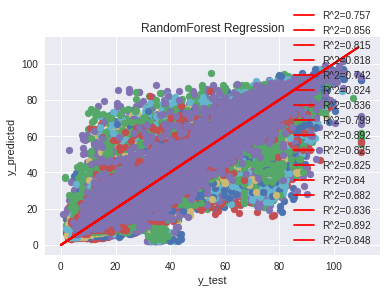

In [4]:
for i in weeknum:
    for j in timeslotlevels:
        dt = pd.read_csv("data/dt_"+str(i)+"_"+str(j)+".csv")
        dt = dt.drop(['Unnamed: 0','X','hour','weekday','weekdiv','timeslot'],axis=1) # EDA
        for var in catagorial_feature_names :
            dt[var] = dt[var].astype("category")
        dt = pd.get_dummies(dt)

        X_train = dt[(dt.date >= 20170301) & (dt.date < 20180301)] # split data
        X_test = dt[(dt.date >= 20180301) & (dt.date < 20180331)]
        y_train = np.array(X_train['speed'])
        X_train = X_train.drop('speed',axis=1)
        y_test = np.array(X_test['speed'])
        X_test = X_test.drop('speed',axis=1)
        dt_list = list(X_train.columns)
        
        rf = RandomForestRegressor(n_estimators = 200, random_state = 1) # randomforest
        rf.fit(X_train, y_train)
        predictions = rf.predict(X_test)
        RMSLE = rmsle(predictions, y_test,convertExp=False)
        r2= r2_score(y_test, predictions)
        print(str(i)+"_"+str(j)+"= ( RMSLE : "+ str(round(RMSLE,3))+"  //  R^2 : "+str(round(r2,3))+")")

        size = max(y_test.max(),predictions.max())
        plt.scatter(y_test,predictions)
        plt.plot(np.arange(0, size), np.arange(0,size), label="R^2=" + str(round(r2,3)), c="r")
        plt.legend(loc="lower right")
        plt.title("RandomForest Regression")
        plt.xlabel("y_test")
        plt.ylabel("y_predicted")
        
        figname = "graph/"+str(i)+"_"+str(j)+".jpg"
        plt.savefig(figname)
        plt.close(figname)